Library,Version
OS,nt [win32]
Python,"3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]"
IPython,7.2.0
MatPlotLib,3.0.2
Numpy,1.15.4
pyAgrum,0.15.2


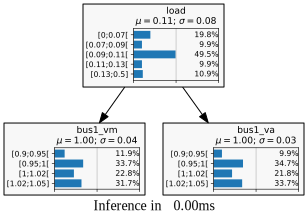

In [10]:
from pylab import *
import matplotlib.pyplot as plt

import pyAgrum as gum 
import pyAgrum.lib.notebook as gnb
import pickle

import numpy as np 

gnb.configuration()
net_set = pickle.load(open('net_results.dat','rb'))



# create a BayesNet
bn=gum.BayesNet('three_bus')

# define network nodes
# ext_grid_var = gum.DiscretizedVariable('ext_grid','the bus connected to the grid')
# ext_grid_var.addTick(0.90).addTick(0.95).addTick(1).addTick(1.05)
# ext_grid = bn.add(ext_grid_var)

# transformer_var= gum.DiscretizedVariable('transformer','transformer')
# transformer_var.addTick(0.9).addTick(1).addTick(1.05)
# transformer = bn.add(transformer_var)

bus1_vm_var = gum.DiscretizedVariable('bus1_vm','bus1 voltage magnitude')
bus1_vm_var.addTick(0.90).addTick(0.95).addTick(1).addTick(1.02).addTick(1.05)
bus1_vm = bn.add(bus1_vm_var)

bus1_va_var = gum.DiscretizedVariable('bus1_va','bus1 voltage angles')
bus1_va_var.addTick(0.90).addTick(0.95).addTick(1).addTick(1.02).addTick(1.05)
bus1_va = bn.add(bus1_va_var)


# line1_var = gum.DiscretizedVariable('line1','line connected to bus1')
# line1_var.addTick(0.90).addTick(0.95).addTick(1).addTick(1.05)
# line1 = bn.add(line1_var)

# bus2_var = gum.DiscretizedVariable('bus2','bus2')
# bus2_var.addTick(0.90).addTick(0.95).addTick(1).addTick(1.05)
# bus2 = bn.add(bus2_var)

load_var = gum.DiscretizedVariable('load','load')
load_var.addTick(0).addTick(0.07).addTick(0.09).addTick(0.11).addTick(0.13).addTick(0.5)
load = bn.add(load_var)



# define network links
bn.addArc(load,bus1_vm)
bn.addArc(load,bus1_va)


# calculate cpt from prior data

bn.cpt(bus1_vm)[:] =[[0.2,0.3,0.2,0.3],[0.1,0.2,0.3,0.4],[0.1,0.4,0.2,0.3],[0.1,0.3,0.2,0.4],[0.1,0.3,0.4,0.3]]
bn.cpt(bus1_va)[:] = [[0.1,0.3,0.2,0.4],[0.1,0.3,0.2,0.4],[0.1,0.4,0.2,0.3],[0.1,0.3,0.2,0.4],[0.1,0.3,0.4,0.3]]
bn.cpt(load)[:] = [0.2,0.1,0.5,0.1,0.1]

# inference 
ie = gum.LazyPropagation(bn)
ie.makeInference()
ie.posterior(load)

ie.setEvidence({'bus1_vm':3})
ie.makeInference()
ie.posterior(load)

gnb.showInference(bn)

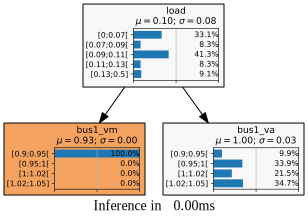

In [16]:
gnb.showInference(bn,evs={'bus1_vm':0})

In [26]:
ie2 = gum.GibbsSampling(bn)

<pyAgrum.pyAgrum.GibbsSampling; proxy of <Swig Object of type 'gum::GibbsSampling< double > *' at 0x000001CBA9096390> >

In [20]:
def vals(bn,ie):
    exact=[]
    appro=[]
    for node in bn.nodes():
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()

    return exact

In [24]:
y = vals(bn,ie2)

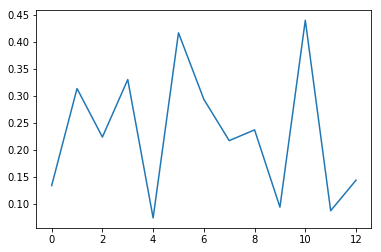

In [25]:
plot(y)

In [35]:
gum.BNDatabaseGenerator(bn).drawSamples((20,1))

TypeError: in method 'BNDatabaseGenerator_drawSamples', argument 2 of type 'gum::Size'